In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from plotnine import *
import seaborn as sns

In [2]:
income_by_age_raw = pd.read_csv('C:/Users/carro/OneDrive/Escritorio/CUNEF/Visualización/income-by-age.csv')

In [3]:
income_by_age_raw.head()

,age,year,median_income,race
0,15 to 24,2016,41655,all
1,25 to 34,2016,60932,all
2,35 to 44,2016,74481,all
3,45 to 54,2016,77213,all
4,55 to 64,2016,65239,all


In [4]:
income_by_age_raw['age'].unique()

array(['15 to 24', '25 to 34', '35 to 44', '45 to 54', '55 to 64',
       '65 to 74', '75 and over'], dtype=object)

In [5]:
income_by_age = (income_by_age_raw
                 .loc[lambda df : df['race'].isin(['white', 'white_non_hispanic', 'asian', 'black', 'hispanic'])]
                 .assign(**{'age': lambda df: df['age'].replace({'75 and over': '75+'})})
                 )

In [6]:
income_by_age.head(1)

,age,year,median_income,race
7,15 to 24,2016,44588,white


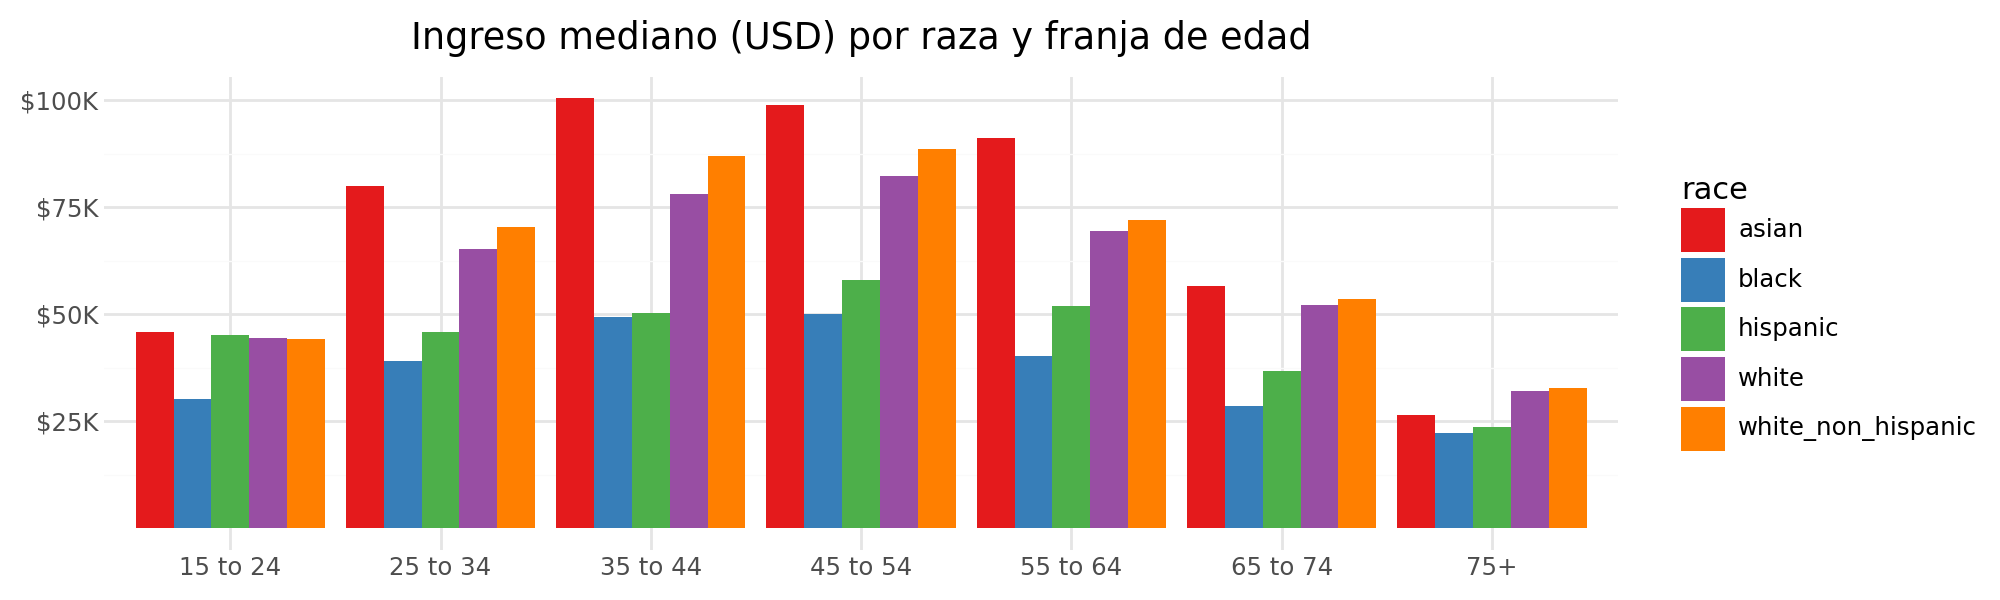

In [19]:
(ggplot(income_by_age, aes(x='age', y='median_income', fill='race'))
    + geom_col(position='dodge')
    + theme_minimal()
    + theme(
        figure_size=(10,3),
    )
    + scale_y_continuous(
        breaks=[25e3, 50e3, 75e3, 100e3],
        labels=['$25K', '$50K', '$75K', '$100K']
    )
    + xlab('')
    + ylab('')
    + ggtitle('Ingreso mediano (USD) por raza y franja de edad')
    + scale_fill_brewer(type='qual', palette='Set1')
    # + scale_fill_manual(values=['#FF0000', '#00FF00', '#0000FF', '#00FFFF', '#FF00FF'])
)

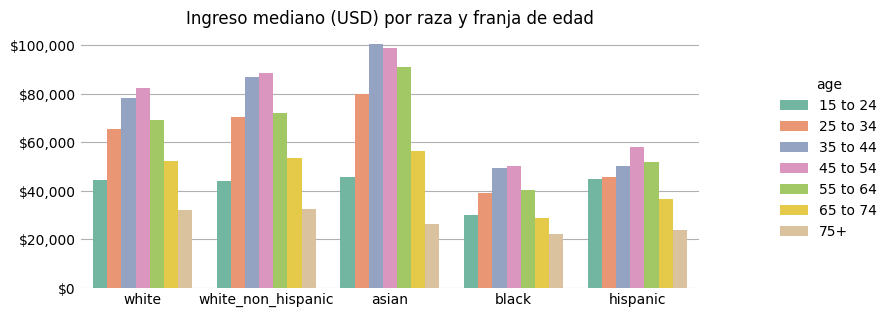

In [23]:
g = sns.catplot(
    data=income_by_age,
    x='race',
    y='median_income',
    hue='age',
    kind='bar',
    zorder=2, #Para que aparezcan las barras por encima de las guías.
    palette='Set2',
    # palette=['#FF0000', '#00FF00', '#0000FF', '#00FFFF', '#FF00FF']
)

g.fig.set_size_inches(10, 3)

g.ax.set_title('Ingreso mediano (USD) por raza y franja de edad')
g.ax.set_xlabel('')
g.ax.set_ylabel('')

g.ax.grid(axis='y')

g.ax.spines[:].set_visible(False)

g.ax.xaxis.set_tick_params(length=0)
g.ax.yaxis.set_tick_params(length=0)

g.ax.yaxis.set_major_formatter('${x:,.0f}')

plt.show()

In [9]:
weather_raw = pd.read_csv('C:/Users/carro/OneDrive/Escritorio/CUNEF/Visualización/datos-metereologicos-2021.csv')

In [10]:
weather = (weather_raw
        .assign(**{'fecha': lambda df: pd.to_datetime(df['fecha'])})
        .assign(**{'mes': lambda df: df['fecha'].dt.month})
        .assign(**{'tmed': lambda df: df['tmed'].str.replace(',', '.').astype(float)})
        )

In [11]:
weather.dtypes

fecha          datetime64[ns]
indicativo             object
nombre                 object
provincia              object
altitud                 int64
tmed                  float64
prec                   object
tmin                   object
horatmin               object
tmax                   object
horatmax               object
dir                   float64
velmedia               object
racha                  object
horaracha              object
sol                    object
presMax                object
horaPresMax            object
presMin                object
horaPresMin            object
mes                     int32
dtype: object